In [ ]:
#### Eugenio Perez Molphe Montoya ####
#### 17.06.2024 ####
#### Create graphs to explore what happened ####
'''
1. An histogram with the percentage identity of the alignments
2. Promoter length distribution and number of promoters distribution
3. Hitogram of LDF
4. Histogram of the position of the promoters in the genomes (bps upstream)
5. Number of genomes fed into BProm
'''

In [1]:
### Libraries ###
import sys
import matplotlib.pyplot as plt
import os
import numpy as np
from Bio import Entrez
import time

1. Histogram of percentage identity

In [ ]:
# Get the percentage identity of the alignments
pathDir = '/mnt/mnemo5/eugenio/IroN_project/Files/03_IroN_BLAST_results'
blastFiles = os.listdir(pathDir)

# Create a list with the percentage identity of the alignments
percentageIdentitySalmonella = []
percentageIdentityEnterobacteriaceae = []
for blastFile in blastFiles:
    if blastFile.startswith('GCA_'):
        evaluePI = {}
        with open(pathDir + '/' + blastFile, 'r') as file:
            for line in file:
                if line.startswith('#'):
                    continue
                else:
                    line = line.split('\t')
                    evaluePI[float(line[10])] = float(line[2])
        if evaluePI:
            percentageIdentitySalmonella.append(evaluePI[max(evaluePI.keys())])
    else:
        evaluePI = {}
        with open(pathDir + '/' + blastFile, 'r') as file:
            for line in file:
                if line.startswith('#'):
                    continue
                else:
                    line = line.split('\t')
                    evaluePI[float(line[10])] = float(line[2])
        if evaluePI:
            percentageIdentityEnterobacteriaceae.append(evaluePI[max(evaluePI.keys())])

print(len(percentageIdentitySalmonella))
print(len(percentageIdentityEnterobacteriaceae))
print(percentageIdentitySalmonella)

In [ ]:
# Make the histogram
plt.hist(percentageIdentityEnterobacteriaceae, bins=30, color='#8E394E', alpha=0.7)
plt.xlabel('Percentage identity')
plt.ylabel('Number of alignments')
plt.title('Percentage identity of the alignments (max evalue)')
plt.show()

In [ ]:
import statistics
mean_value = statistics.mean(percentageIdentitySalmonella)
median_value = statistics.median(percentageIdentitySalmonella)
mode_value = statistics.mean(percentageIdentitySalmonella)

print(mean_value)
print(median_value)
print(mode_value)

2. See if there's relation between sequence length and number of promoter regions found

In [8]:
# Let's create a numpy array to save our results
lengthPromoters = np.zeros((0,2))

# Column 0 is length, column 1 is the number of promoters found

In [ ]:
def create_list_from_directoy(pathDir, lengthPromoters):
    '''
    Take a directory of BProm outputs, and read all of its files looking for the length of the sequence and the number of promoters
    '''
    Files = os.listdir(pathDir)

    for BPromfile in Files:
        with open(pathDir + '/' + BPromfile, 'r') as file:
            lines = file.readlines()
        # Let' obtain the length of the sequence
        seqLength = int(lines[1].split(" ")[-1].strip())

        # Let's obtain the number of predicted promoters
        numberPromoters = int(lines[3][-2])
        if numberPromoters > 1:
            print(BPromfile)

        lengthPromoters = np.vstack([lengthPromoters, np.array([seqLength, numberPromoters])])

    return lengthPromoters

pathDir = '/mnt/mnemo5/eugenio/IroN_project/Files/06_Promoters/BProm_Enterobacteriaceae_line_breaks'
lengthPromoters = create_list_from_directoy(pathDir, lengthPromoters)
print(lengthPromoters.shape)

pathDir = '/mnt/mnemo5/eugenio/IroN_project/Files/06_Promoters/BProm_Salmonella_line_breaks'
lengthPromoters = create_list_from_directoy(pathDir, lengthPromoters)
print(lengthPromoters.shape)

pathDir = '/mnt/mnemo5/eugenio/IroN_project/Files/10_Escherichia/BProm_results_w_breaks'
lengthPromoters = create_list_from_directoy(pathDir, lengthPromoters)
print(lengthPromoters.shape)


(251, 2)
(7722, 2)
(9602, 2)


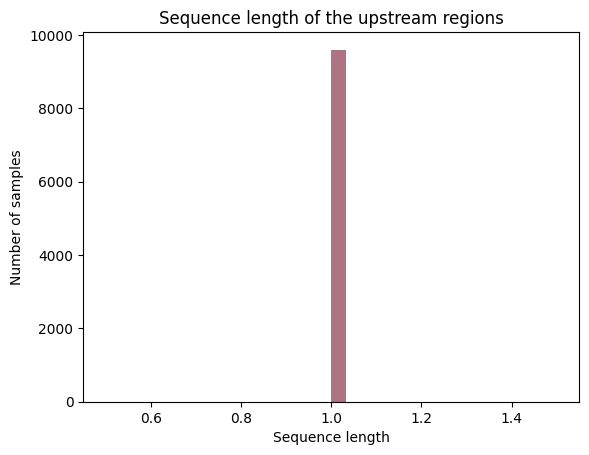

In [10]:
plt.hist(lengthPromoters[: , 1], bins=30, color='#8E394E', alpha=0.7)
plt.xlabel('Sequence length')
plt.ylabel('Number of samples')
plt.title('Sequence length of the upstream regions')
plt.show()

In [ ]:
column_to_check = 0
unique_numbers = np.unique(lengthPromoters[:, column_to_check])

print("Unique numbers in column {}: {}".format(column_to_check, unique_numbers))

In [ ]:
### This is weird, all the sequences have the same length, let's check the original fasta file
pathEntero = '/mnt/mnemo5/eugenio/IroN_project/Files/05_Upstream_seqs/enterobacteriaceae_upstream_seqs_300_bp_trimmed.fa'
pathSalmo = '/mnt/mnemo5/eugenio/IroN_project/Files/05_Upstream_seqs/salmonella_upstream_seqs_300_bp_trimmed.fa'

seqLengths = []
with open(pathEntero, 'r') as file:
    lines = file.readlines()
    for line in lines:
        if line.startswith('>'):
            continue
        else:
            seqLengths.append(len(line.strip()))

with open(pathSalmo, 'r') as file:
    lines = file.readlines()
    for line in lines:
        if line.startswith('>'):
            continue
        else:
            seqLengths.append(len(line.strip()))

print(np.unique(seqLengths))

### So basically BProm is taking the first 80 bp of the sequence and ignoring the rest
### BProm: 80
### Raw seq length: [126 129 132 152 168 174 186 188 189 197 201 247 253 264 271 279 298 300]

In [ ]:
plt.hist(seqLengths, bins=30, color='#8E394E', alpha=0.7)
plt.xlabel('Sequence length')
plt.ylabel('Number of samples')
plt.title('Raw sequence length of the upstream regions')
plt.show()

3. Histogram of LDF

In [ ]:
def read_LDFs(path, LDFlist):
    with open(path, 'r') as file:
        lines = file.readlines()
    ldfValue = lines[4].split(' ')[-1].strip()
    LDFlist.append(float(ldfValue))

LDFs = []
inputDir = '/mnt/mnemo5/eugenio/IroN_project/Files/06_Promoters/BProm_results_enterobacteriaceae'
fileList = [inputDir + '/' + file for file in os.listdir(inputDir)]

for file in fileList:
    read_LDFs(file, LDFs)

inputDir = '/mnt/mnemo5/eugenio/IroN_project/Files/06_Promoters/BProm_results_salmonella'
fileList = [inputDir + '/' + file for file in os.listdir(inputDir)]

for file in fileList:
    read_LDFs(file, LDFs)

In [ ]:
plt.hist(LDFs, bins=50, color='#8E394E', alpha=0.7)
plt.xlabel('LDF score')
plt.ylabel('Number of samples')
plt.title('LDF scores of the predicted promoters')
plt.show()

4. Position of predicted promoters (bps upstream)

In [4]:
#### For the positions of the predicted promoters
def read_positions(path, positionsList):
    with open(path, 'r') as file:
        fileLines = file.readlines()

    # Let's obtain the length of the sequence, so I'll get the number of bp upstream 
    seqLength = int(fileLines[1].split(" ")[-1].strip())
    
    # First, I'll filter the lines before the first promoter
    startProcessing = False
    filteredLines = []
    for line in fileLines:
        if line.startswith("For promoter"):
            startProcessing = True
        if startProcessing:
            filteredLines.append(line)

    # Then, I'll get the promoters
    promoters = []
    currentPromoter = []
    # Iterate over the lines and dump the possible promoters into the currentPromoter list
    for line in filteredLines:
        if line.startswith("For promoter"):
            promoters.append(currentPromoter)
            currentPromoter = []
            continue
        # Skip adding the "For promoter" line to the current section, we only care about the identified promoters
        currentPromoter.append(line)

    # Don't forget to add the last section if it exists
    if currentPromoter:
        promoters.append(currentPromoter)
        # Now, let's get the list of the most possible promoters per each identified promoters
    # In other words, the promoters influencing iroN
    iroNpromoters = []

    for promoter in promoters:
        # I'll create a dictionary to store the information: keys as scores and values as the name of the promoter
        for oligo in promoter:
            oligo = oligo.strip().split(" ")
            if oligo[-1] != 'sites':
                try:
                    distance = int(oligo[10])
                except:
                    try:
                        distance = int(oligo[9])
                    except:
                        distance = int(oligo[11])

            distance = seqLength - distance
            iroNpromoters.append(distance)
    
    positionsList += iroNpromoters
           
    return positionsList

positionsList = []




inputDir = '/mnt/mnemo5/eugenio/IroN_project/Files/06_Promoters/BProm_Enterobacteriaceae_line_breaks'
fileList = [inputDir + '/' + file for file in os.listdir(inputDir)]
for file in fileList:
    read_positions(file, positionsList)

inputDir = '/mnt/mnemo5/eugenio/IroN_project/Files/06_Promoters/BProm_Salmonella_line_breaks'
fileList = [inputDir + '/' + file for file in os.listdir(inputDir)]
for file in fileList:
    read_positions(file, positionsList)

inputDir = '/mnt/mnemo5/eugenio/IroN_project/Files/10_Escherichia/BProm_results_w_breaks'
fileList = [inputDir + '/' + file for file in os.listdir(inputDir)]
for file in fileList:
    read_positions(file, positionsList)

In [5]:
print(positionsList)

[161, 147, 119, 233, 214, 186, 161, 147, 119, 89, 87, 77, 161, 156, 147, 119, 161, 147, 119, 89, 87, 77, 233, 214, 186, 92, 91, 66, 32, 161, 147, 119, 161, 147, 119, 90, 88, 86, 84, 72, 164, 159, 149, 148, 144, 134, 123, 107, 90, 88, 86, 84, 72, 122, 120, 117, 90, 88, 86, 84, 72, 90, 88, 86, 84, 72, 89, 107, 55, 89, 87, 77, 195, 183, 182, 140, 132, 129, 126, 93, 92, 89, 214, 186, 122, 120, 117, 161, 147, 119, 214, 186, 141, 95, 94, 81, 80, 161, 156, 147, 119, 233, 214, 186, 89, 161, 147, 119, 161, 156, 147, 119, 161, 156, 147, 119, 214, 186, 233, 214, 186, 161, 147, 119, 161, 147, 119, 214, 186, 161, 147, 119, 34, 161, 147, 119, 214, 186, 63, 60, 58, 89, 87, 77, 63, 60, 58, 121, 117, 104, 102, 74, 161, 147, 119, 161, 147, 119, 161, 147, 119, 90, 88, 86, 84, 72, 23, 140, 132, 128, 127, 126, 93, 92, 89, 161, 147, 119, 52, 21, 161, 156, 147, 119, 214, 186, 161, 147, 119, 52, 21, 161, 147, 119, 235, 233, 214, 186, 133, 116, 103, 101, 73, 70, 52, 21, 161, 147, 119, 63, 60, 58, 225, 202, 201

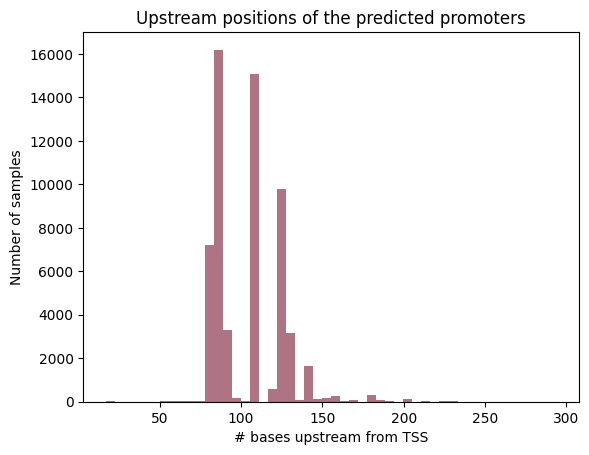

In [6]:
plt.hist(positionsList, bins=50, color='#8E394E', alpha=0.7)
plt.xlabel('# bases upstream from TSS')
plt.ylabel('Number of samples')
plt.title('Upstream positions of the predicted promoters')
plt.show()

In [14]:
### Check the proportion of the promoters within 40 bp upstream
promoters40bp = [i for i in positionsList if i <= 130]
print(len(promoters40bp))
print(len(positionsList))   
print(len(promoters40bp) / len(positionsList))

54043
58764
0.9196616976380096


5. Number of genomes that were fed to BProm

In [15]:
## Functions

def fetch_genbank_assembly_from_sample(biosample_codes):
    """
    Get the Genbank accession number based on the NCBI code
    """
    Entrez.email = "eugenio.perez@mls.uzh.ch"
    genbank_assemblies = {}
    failedSearches = []
    max_retries = 50
    retry_delay = 5
    for sample_code in biosample_codes:
        attempt = 0
        while attempt < max_retries:
            try:
                # Step 1: Search the Assembly database linked to the BioSample
                handle = Entrez.esearch(db="assembly", term=f"{sample_code}[biosample]")
                record = Entrez.read(handle)
                handle.close()

                # Check if any assembly IDs were found
                if record['IdList']:
                    assembly_id = record['IdList'][0]

                    # Step 2: Fetch the GenBank assembly accession using the assembly ID
                    handle = Entrez.esummary(db="assembly", id=assembly_id, report="full")
                    summary_record = Entrez.read(handle)
                    handle.close()
                    print(summary_record['DocumentSummarySet']['DocumentSummary'][0]['Synonym']['Genbank'])
                    genbank_assembly = summary_record['DocumentSummarySet']['DocumentSummary'][0]['Synonym']['Genbank']
                    genbank_assemblies[sample_code] = genbank_assembly

                    attempt = max_retries
                else:
                    attempt += 1
                    if attempt < max_retries:
                        print(f"No assembly found for BioSample {sample_code}. Retrying in {retry_delay} seconds...")
                        time.sleep(retry_delay)
                    else:
                        genbank_assemblies[sample_code] = sample_code
                        failedSearches.append(sample_code)
                        print(f"No assembly found for BioSample {sample_code}")

            except Exception as e:
                attempt += 1
                if attempt < max_retries:
                    print(f"Error fetching data for BioSample {sample_code}: {e}. Retrying in {retry_delay} seconds...")
                    time.sleep(retry_delay)
                else:
                    print(f"Error fetching data for BioSample {sample_code}: {e}")
                    genbank_assemblies[sample_code] = sample_code
                    failedSearches.append(sample_code)

    print(f"Failed searches: {failedSearches}")
    return genbank_assemblies


def read_Entero_files(path):
    # Read the files with Enterobacteriaceae sequences and outputs a set with their genomes

    sampleList = []

    with open(path, 'r') as f: # Open the file
        listHeaders = f.readlines()
    
    for line in listHeaders: # Iterate over the lines and get the headers of the sequences
        if line.startswith('>'):
            sampleCode = line.split('.')[1]
            sampleList.append(sampleCode)

    sample_accessionCodes = fetch_genbank_assembly_from_sample(sampleList) # Get the accession codes
    accessionList = list(sample_accessionCodes.values())

    return accessionList

def read_Salmo_eColi_files(path):
    # Read the files with Salmonella and E. coli sequences and outputs a set with their genomes

    sampleList = []

    with open(path, 'r') as f: # Open the file
        listHeaders = f.readlines()
    
    for line in listHeaders: # Iterate over the lines and get the headers of the sequences
        if line.startswith('>'):
            sampleCode = line.strip('_upstream_seq\n')
            sampleCode = sampleCode[1:]

            if sampleCode.startswith('GCA_'): # E. coli has assembly codes in them, this will help to only obtain the assembly code and not the rest of the header
                sampleCode = sampleCode.split('_')[0] + '_' + sampleCode.split('_')[1]
            
            sampleList.append(sampleCode)

    return sampleList

def read_dictionary_for_accession_codes(dictionary):
    # So some data sets have sample or contig codes, I need the assembly code, so I need a dictionary to translate the former one into the latter
    with open(dictionary, 'r') as f:
        translator = f.readlines()
    codesList = [l.split(',') for l in translator]
    codesDict = {}
    for genomes in codesList:
        codesDict[genomes[0]] = genomes[1]
    
    return codesDict


In [16]:
## Paths

# The Enterobacteriaceae fasta files
pathEnteroPlus = '/mnt/mnemo5/eugenio/IroN_project/Files/05_Upstream_seqs/enterobacteriaceae_upstream_seqs_300_bp_trimmed.fa'
pathEnteroMinus = '/mnt/mnemo5/eugenio/IroN_project/Files/05_Upstream_seqs/upstream_300_bp_minus_enterobacteriaceae.fa'
pathEnteroTotalPlus = '/mnt/mnemo5/eugenio/IroN_project/Files/05_Upstream_seqs/enterobacteriaceae_upstream_seqs_300_bp.fa'
pathEnteroTrimmedMinus = '/mnt/mnemo5/eugenio/IroN_project/Files/05_Upstream_seqs/upstream_300_bp_minus_enterobacteriaceae.trimmed.fa'

# The salmonella fasta files
pathSalmoPlus = '/mnt/mnemo5/eugenio/IroN_project/Files/05_Upstream_seqs/salmonella_upstream_seqs_300_bp_trimmed.fa'
pathSalmoMinus = '/mnt/mnemo5/eugenio/IroN_project/Files/05_Upstream_seqs/upstream_300_bp_minus_salmonella.fa'
pathSalmoTotalPlus = '/mnt/mnemo5/eugenio/IroN_project/Files/05_Upstream_seqs/salmonella_upstream_seqs_300_bp.fa'
pathSalmoTrimmedMinus = '/mnt/mnemo5/eugenio/IroN_project/Files/05_Upstream_seqs/upstream_300_bp_minus_salmonella.trimmed.fa'

# The E. coli fasta files
pathEColi = '/mnt/mnemo5/eugenio/IroN_project/Files/10_Escherichia/upstream_300_bp_escherichia.fa'
pathEColiTrimmed = '/mnt/mnemo5/eugenio/IroN_project/Files/10_Escherichia/upstream_300_bp_escherichia.trimmed.fa'

# The Salmonella dictionary: contigs - accession numbers
pathNCBIcodesSalmo = '/mnt/mnemo5/eugenio/IroN_project/Files/07_Final_Report/Salmonella_header_NCBIcode.csv'

# The E. coli dictionary: samples - accession numbers
pathNCBIcodesEcoli = "/mnt/mnemo5/eugenio/IroN_project/Files/10_Escherichia/Results/Escherichia_contig-NCBI_codes.csv"

In [18]:
### Get the number of Enterobacteriaceae genomes

# Get the sample codes from the files 
minus = set(read_Entero_files(pathEnteroMinus))
plus = set(read_Entero_files(pathEnteroTotalPlus))
trimmedMinus = set(read_Entero_files(pathEnteroTrimmedMinus))
trimmedPlus = set(read_Entero_files(pathEnteroPlus))

total = plus | minus
totalTrimmed = trimmedMinus | trimmedPlus

print('Total: ',len(total))
print('Plus', len(plus))
print('Minus', len(minus))
print('With upstream sequences', len(totalTrimmed))

GCA_000878475.1
GCA_002724035.1
GCA_902161885.1
GCA_900083565.1
GCA_905210975.1
GCA_019678825.1
GCA_020120175.1
GCA_017810085.1
GCA_000255535.1
GCA_000409245.1
GCA_002035265.1
GCA_006149135.1
GCA_000507385.1
GCA_014431485.1
GCA_002035315.1
GCA_000439255.1
GCA_000958225.1
GCA_018597905.1
GCA_000709535.1
GCA_000534035.1
GCA_019710705.1
GCA_017163885.1
GCA_001485355.1
GCA_001485375.1
GCA_900177785.1
GCA_001808015.1
GCA_000758305.1
GCA_018446855.1
GCA_902164705.1
GCA_900558415.1
GCA_900558775.1
GCA_900558065.1
GCA_900075745.1
GCA_900465085.1
GCA_000534175.1
GCA_000952405.1
GCA_000958725.1
GCA_003289325.1
GCA_003363215.1
GCA_015686035.1
GCA_004794965.1
GCA_006546545.1
GCA_018455485.1
GCA_015683035.1
GCA_015266255.1
GCA_015704035.1
GCA_016634105.1
GCA_016632585.1
GCA_016427985.1
GCA_018420435.1
GCA_019038895.1
GCA_019449085.1
GCA_001043635.1
GCA_900184035.1
GCA_002510255.1
GCA_015167415.1
GCA_001022855.1
GCA_902362195.1
GCA_902387465.1
GCA_905208965.1
GCA_018379085.1
GCA_002339925.1
GCA_0023

In [20]:
### Get the number of Escherichia genomes

# Read the E. coli contig - accession code dictionary
eColiDict = read_dictionary_for_accession_codes(pathNCBIcodesEcoli)

# Get the sample codes from the files
total = read_Salmo_eColi_files(pathEColi)
totalTrimmed = read_Salmo_eColi_files(pathEColiTrimmed)

# Now, let's get the accession codes of the ones registered as contigs
total = [eColiDict[contig] for contig in total if contig in eColiDict]
totalTrimmed = [eColiDict[contig] for contig in totalTrimmed if contig in eColiDict]

# Let's transform them into sets
total = set(total)
totalTrimmed = set(totalTrimmed)

print('Total: ',len(total))
print('With upstream sequences', len(totalTrimmed))

Total:  1175
With upstream sequences 1109


In [21]:
### Get the number of Salmonella genomes

# Read the salmonella contig - accession code dictionary
salmoDict = read_dictionary_for_accession_codes(pathNCBIcodesSalmo)

# Get the contig codes from the files
minus = read_Salmo_eColi_files(pathSalmoMinus)
plus = read_Salmo_eColi_files(pathSalmoTotalPlus)
trimmedMinus = read_Salmo_eColi_files(pathSalmoTrimmedMinus)
trimmedPlus = read_Salmo_eColi_files(pathSalmoPlus)

# Now let's get the accession codes of the ones registered as contigs
minus = set([salmoDict[contig] for contig in minus])
plus = set([salmoDict[contig] for contig in plus])
trimmedMinus = set([salmoDict[contig] for contig in trimmedMinus])
trimmedPlus = set([salmoDict[contig] for contig in trimmedPlus])

total = plus | minus
totalTrimmed = trimmedMinus | trimmedPlus

print('Total: ',len(total))
print('Plus', len(plus))
print('Minus', len(minus))
print('With upstream sequences', len(totalTrimmed))

Total:  7472
Plus 2739
Minus 4733
With upstream sequences 7471


In [1]:
path = '/mnt/mnemo5/eugenio/IroN_project/Files/06_Promoters/BProm_Salmonella_line_breaks/AAKXDH010000005.1_upstream_seq.out'

with open(path, 'r') as file:
    fileLines = file.readlines()

for i in fileLines:
    print(i)

>AAKXDH010000005.1_upstream_seq                                                 

 Length of sequence            -     300

 Threshold for promoters       -    0.20

 Number of predicted promoters -       1

Promoter     149 -     208          LDF -   6.65

  TSS                  208

 -10 box     197 -     202  TATTAT  Score    60

 -35 box     170 -     175  TTGCCT  Score    56



Oligonucleotides from known TF binding sites:



For promoter at     208:

       purR:  CTTTTTCT at position     174 Score -   6

        fur:  ATGATAAT at position     189 Score -   8

     rpoD17:  TGATAATT at position     190 Score -   9

        fur:  ATGATAAT at position     212 Score -   8

     rpoD17:  ATAATAAT at position     215 Score -   8

       argR:  AATAATTA at position     217 Score -  17

